<a href="https://colab.research.google.com/github/kilinandrea/mock_mabs/blob/main/MOCK_MABS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [34]:
# Create a dictionary with the data
data = {
    'Ligand Density (mol/m^2)': [200, 250, 180, 220, 240, 200, 230, 210, 220, 190],
    'Pore Size (nm)': [50, 60, 55, 65, 50, 60, 55, 70, 60, 50],
    'pH': [7, 7, 8, 7, 8, 8, 7, 8, 8, 7],
    'Salt Concentration (mM)': [100, 150, 120, 100, 150, 120, 130, 140, 110, 140],
    'Binding Capacity (mg/mL)': [10, 12, 9.5, 11, 11.5, 10.5, 10.8, 11.2, 10.2, 9.8],
    'Purification Efficiency (%)': [90, 92, 88, 91, 92, 89, 91, 90, 88, 87]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


   Ligand Density (mol/m^2)  Pore Size (nm)  pH  Salt Concentration (mM)  \
0                       200              50   7                      100   
1                       250              60   7                      150   
2                       180              55   8                      120   
3                       220              65   7                      100   
4                       240              50   8                      150   
5                       200              60   8                      120   
6                       230              55   7                      130   
7                       210              70   8                      140   
8                       220              60   8                      110   
9                       190              50   7                      140   

   Binding Capacity (mg/mL)  Purification Efficiency (%)  
0                      10.0                           90  
1                      12.0                  

In [15]:
# Summary statistics
summary_statistics = df.describe()
print(summary_statistics)



       Ligand Density (mol/m^2)  Pore Size (nm)         pH  \
count                 10.000000       10.000000  10.000000   
mean                 214.000000       57.500000   7.500000   
std                   22.211108        6.770032   0.527046   
min                  180.000000       50.000000   7.000000   
25%                  200.000000       51.250000   7.000000   
50%                  215.000000       57.500000   7.500000   
75%                  227.500000       60.000000   8.000000   
max                  250.000000       70.000000   8.000000   

       Salt Concentration (mM)  Binding Capacity (mg/mL)  \
count                10.000000                 10.000000   
mean                126.000000                 10.650000   
std                  18.973666                  0.794775   
min                 100.000000                  9.500000   
25%                 112.500000                 10.050000   
50%                 125.000000                 10.650000   
75%                 1

Similarly, we could vizualize it as a scatterplot such as:

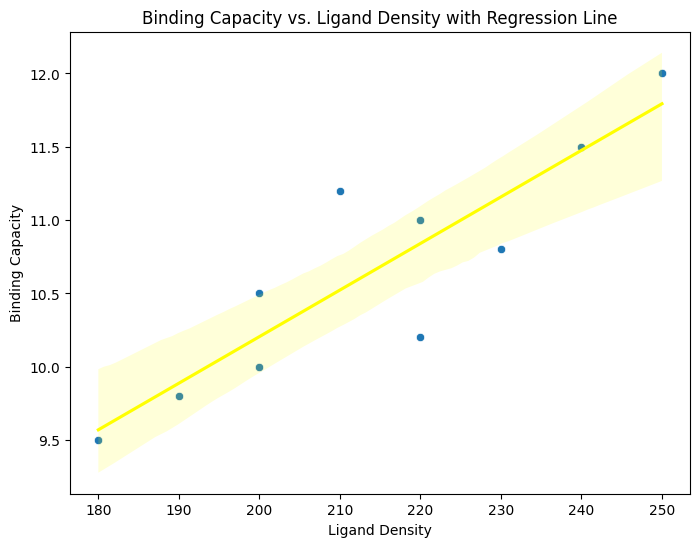

In [35]:


# EDA: Scatter plot of binding capacity vs. ligand density
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ligand Density (mol/m^2)', y='Binding Capacity (mg/mL)', data=df)
sns.regplot(x='Ligand Density (mol/m^2)', y='Binding Capacity (mg/mL)', data=df, scatter=False, color='yellow')  # Add regression line
plt.xlabel('Ligand Density')
plt.ylabel('Binding Capacity')
plt.title('Binding Capacity vs. Ligand Density with Regression Line')
plt.show()


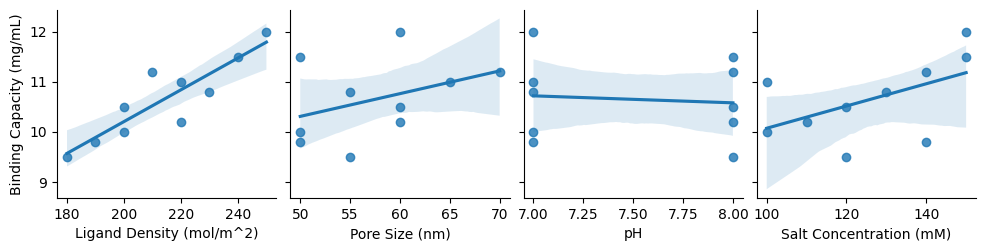

In [36]:
# Scatter plots for Binding Capacity
sns.pairplot(df, x_vars=['Ligand Density (mol/m^2)', 'Pore Size (nm)', 'pH', 'Salt Concentration (mM)'], y_vars='Binding Capacity (mg/mL)', kind='reg')
plt.show()

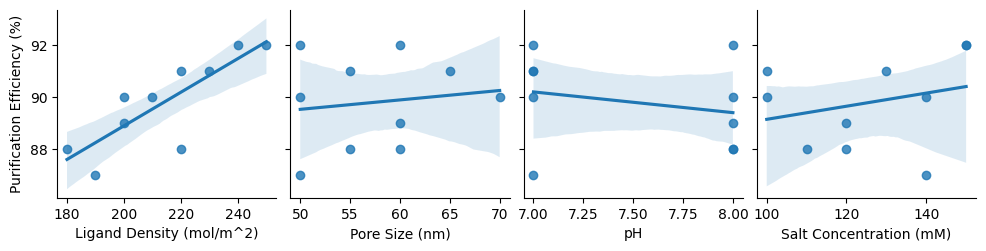

In [37]:
# Scatter plots for Purification Efficiency
sns.pairplot(df, x_vars=['Ligand Density (mol/m^2)', 'Pore Size (nm)', 'pH', 'Salt Concentration (mM)'], y_vars='Purification Efficiency (%)', kind='reg')
plt.show()

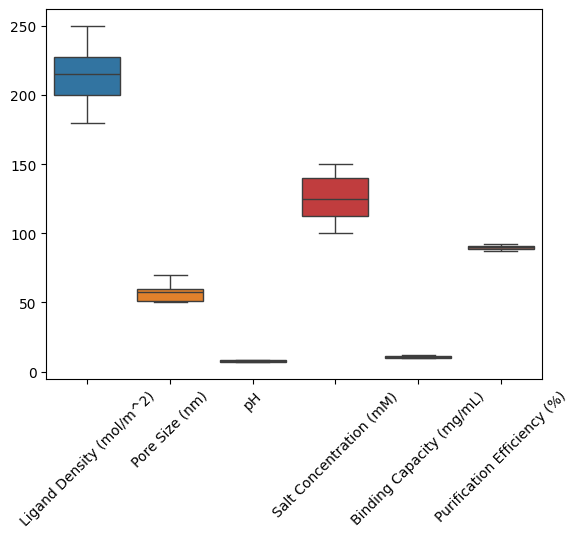

In [38]:
# Boxplot to visualize potential outliers
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

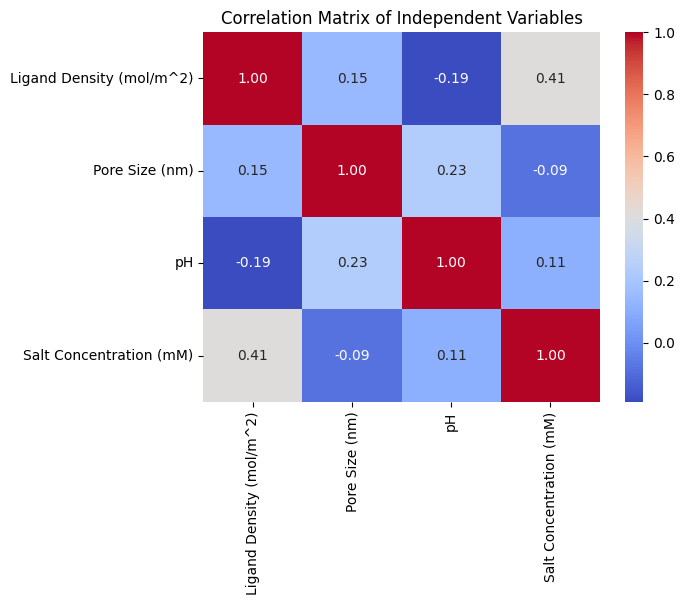

In [39]:
# Calculate correlation matrix
correlation_matrix = df[['Ligand Density (mol/m^2)', 'Pore Size (nm)', 'pH', 'Salt Concentration (mM)']].corr()

# Visualize correlation matrix using heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Independent Variables')
plt.show()


Generally correlation coefficients below 0.4 indicate weak or no linear relationship between variables. In this case, all correlation coefficients being below 0.41 suggests that there is no strong multicollinearity among the independent variables.

**PERFORMANCE INDICATOR: BINDING CAPACITY (mg/mL)**

In [40]:



# Define independent variables (excluding constant)
X = df[['Ligand Density (mol/m^2)', 'Pore Size (nm)', 'pH', 'Salt Concentration (mM)']]

# Add constant term
X = sm.add_constant(X)

# Define dependent variable
y = df['Binding Capacity (mg/mL)']

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     Binding Capacity (mg/mL)   R-squared:                       0.909
Model:                                  OLS   Adj. R-squared:                  0.837
Method:                       Least Squares   F-statistic:                     12.52
Date:                      Tue, 16 Apr 2024   Prob (F-statistic):            0.00813
Time:                              18:04:27   Log-Likelihood:                0.63045
No. Observations:                        10   AIC:                             8.739
Df Residuals:                             5   BIC:                             10.25
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Bases on the OLS results, we can remove two predictors as their p-values are above 0.05.  The ones we discard are pH levels and salt concentration.

In [ ]:
# Define independent variables (excluding constant)
X = df[['Ligand Density (mol/m^2)', 'Pore Size (nm)']]

# Add constant term
X = sm.add_constant(X)

# Define dependent variable
y = df['Binding Capacity (mg/mL)']

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Binding Capacity (mg/mL)   R-squared:                       0.855
Model:                                  OLS   Adj. R-squared:                  0.813
Method:                       Least Squares   F-statistic:                     20.58
Date:                      Sat, 06 Apr 2024   Prob (F-statistic):            0.00117
Time:                              18:28:12   Log-Likelihood:                -1.7225
No. Observations:                        10   AIC:                             9.445
Df Residuals:                             7   BIC:                             10.35
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In this new combination, we observe that really only **ligand density** has a statistically relevant impact on binding capacity:
R squared is 0.855 which shows this model as a **good fit**, while F's p-value is 0.00117, less than 0.05 so we know this is **statistically relevant with 95% confidence.**

Let's see what these look like:


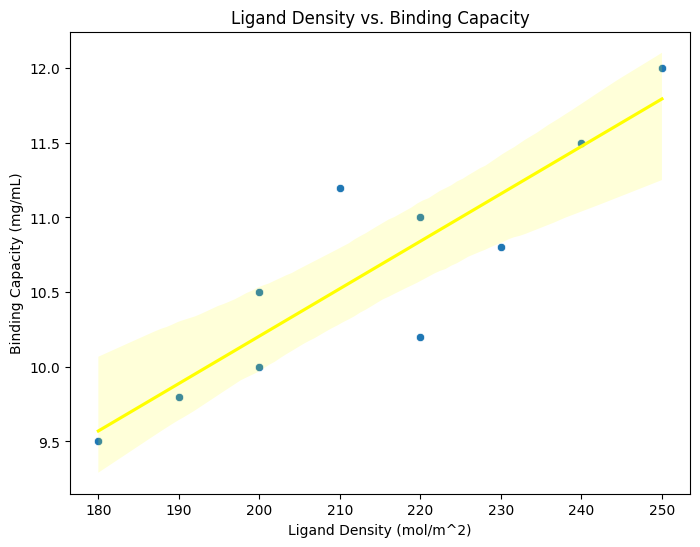

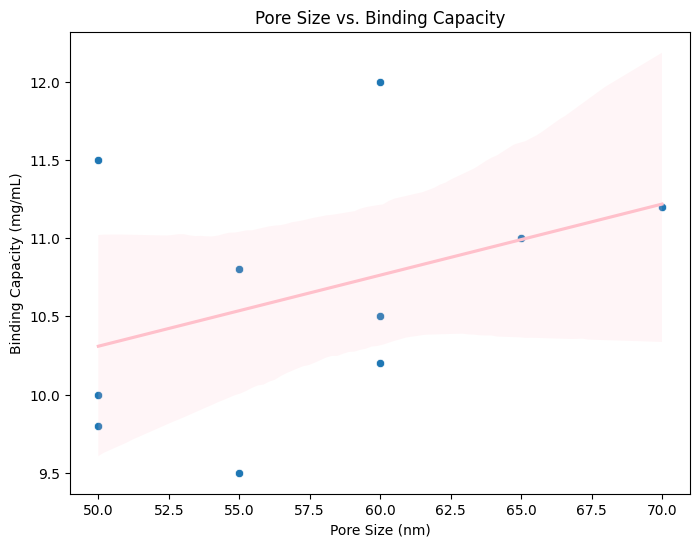

In [41]:
# Scatter plot of Ligand Density vs. Binding Capacity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ligand Density (mol/m^2)', y='Binding Capacity (mg/mL)', data=df)
sns.regplot(x='Ligand Density (mol/m^2)', y='Binding Capacity (mg/mL)', data=df, scatter=False, color='yellow')
plt.title('Ligand Density vs. Binding Capacity')
plt.xlabel('Ligand Density (mol/m^2)')
plt.ylabel('Binding Capacity (mg/mL)')
plt.show()

# Scatter plot of Pore Size vs. Binding Capacity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pore Size (nm)', y='Binding Capacity (mg/mL)', data=df)
sns.regplot(x='Pore Size (nm)', y='Binding Capacity (mg/mL)', data=df, scatter=False, color='pink')
plt.title('Pore Size vs. Binding Capacity')
plt.xlabel('Pore Size (nm)')
plt.ylabel('Binding Capacity (mg/mL)')
plt.show()


**PERFORMANCE INDICATOR: PURIFICATION EFFICIENCY**

In [42]:

# Define independent variables (excluding constant)
X = df[['Ligand Density (mol/m^2)', 'Pore Size (nm)', 'pH', 'Salt Concentration (mM)']]

# Add constant term
X = sm.add_constant(X)

# Define dependent variable
y = df['Purification Efficiency (%)']

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Purification Efficiency (%)   R-squared:                       0.688
Model:                                     OLS   Adj. R-squared:                  0.439
Method:                          Least Squares   F-statistic:                     2.759
Date:                         Tue, 16 Apr 2024   Prob (F-statistic):              0.148
Time:                                 18:06:34   Log-Likelihood:                -13.439
No. Observations:                           10   AIC:                             36.88
Df Residuals:                                5   BIC:                             38.39
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Only statistically relevant impacting factor is, again, Ligand Density. Therefore:

In [ ]:
# Define independent variables (excluding constant)
X = df[['Ligand Density (mol/m^2)']]

# Add constant term
X = sm.add_constant(X)

# Define dependent variable
y = df['Purification Efficiency (%)']

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Purification Efficiency (%)   R-squared:                       0.677
Model:                                     OLS   Adj. R-squared:                  0.636
Method:                          Least Squares   F-statistic:                     16.76
Date:                         Sat, 06 Apr 2024   Prob (F-statistic):            0.00347
Time:                                 18:37:36   Log-Likelihood:                -13.617
No. Observations:                           10   AIC:                             31.23
Df Residuals:                                8   BIC:                             31.84
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


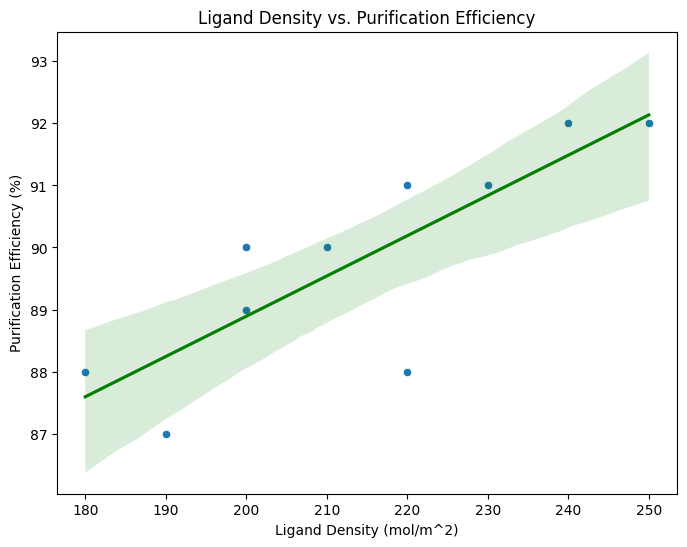

In [ ]:
# Scatter plot of Ligand Density vs. Purification Efficiency
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ligand Density (mol/m^2)', y='Purification Efficiency (%)', data=df)
sns.regplot(x='Ligand Density (mol/m^2)', y='Purification Efficiency (%)', data=df, scatter=False, color='green')
plt.title('Ligand Density vs. Purification Efficiency')
plt.xlabel('Ligand Density (mol/m^2)')
plt.ylabel('Purification Efficiency (%)')
plt.show()

**PREDICTIVE MODELING**

Our sample size is quite small for a reliable predictive model, but let's go through the motions:

In [43]:


# FOR BINDING CAPACITY

# Step 1: Prepare the data
X = df[['Ligand Density (mol/m^2)', 'Pore Size (nm)']]
y = df['Binding Capacity (mg/mL)']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Choose a model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)




Mean Squared Error: 0.31614469565507014
R-squared: 0.6096979065986792


**Mean Squared Error** (MSE): The MSE measures the average squared difference between the actual and predicted values. In this case, the MSE is approximately 0.3161. Lower values of MSE indicate better performance, as it means the model's predictions are closer to the actual values on average.

**R-squared** (R2): R-squared is a measure of how well the independent variables explain the variance in the dependent variable. It ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain any of the variability in the dependent variable. In this case, the *R-squared value is approximately 0.6097*, indicating that about 60.97% of the variance in 'Binding Capacity' can be explained by 'Ligand Density' and 'Pore Size' in the model.

In [44]:
# FOR PURIFICATION EFFICIENCY

# Step 1: Prepare the data
X = df[['Ligand Density (mol/m^2)']]
y = df['Purification Efficiency (%)']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Choose a model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)




Mean Squared Error: 3.7405970652723797
R-squared: 0.06485073368190508


**Mean Squared Error** (MSE): In this case, the MSE is approximately 3.7406. A higher MSE indicates that the model's predictions are further away from the actual values on average.

**R-squared** (R2): In this case, the R-squared value is approximately 0.0649, which is relatively low. It indicates that only about 6.49% of the variance in 'Purification Efficiency' can be explained by 'Ligand Density' in the model.

These results suggest that the model based solely on 'Ligand Density' may **not be a strong predictor** of 'Purification Efficiency'. Other factors not included in the model may have a significant impact on 'Purification Efficiency'.